<a href="https://colab.research.google.com/github/abwakujeff/Abwachara-Movers-Website/blob/main/Fiiting_Arima_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
data = yf.download('AAPL', start='2015-1-1', end='2024-12-17')

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02,24.347170,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.661274,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.663500,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.995314,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.917276,27.972500,28.037500,27.174999,27.307501,237458000


<Axes: xlabel='Date'>

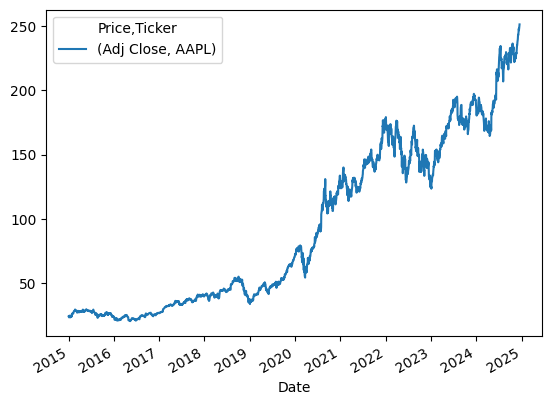

In [15]:
#Keeping Adjusted Close
price = data[['Adj Close']]
data.plot()

STATIONARITY

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

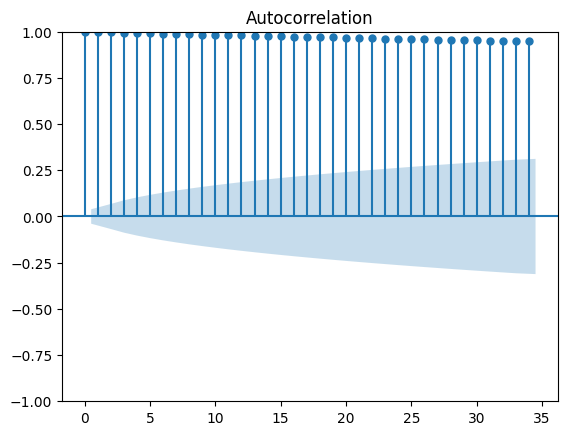

In [17]:
plot_acf(price)
plt.show()

**Augmented Dickey-Fuller test**  
HO: Non-stationarity  
H1: Stationary

In [13]:
#load library for Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

In [18]:
adfuller(price)

(0.9301502929966077,
 0.9934714469187397,
 10,
 2495,
 {'1%': -3.4329736635735393,
  '5%': -2.8626991196096556,
  '10%': -2.5673870444295406},
 10301.270603582609)

#White noise process

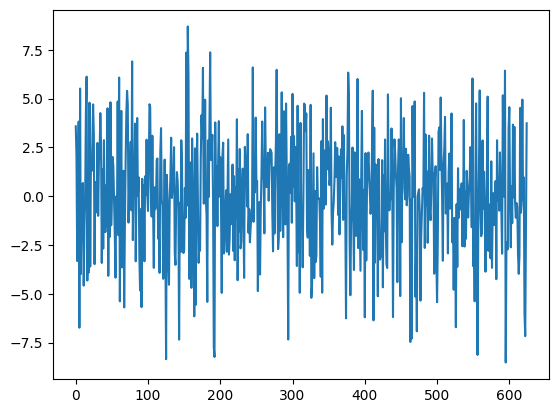

In [23]:
wt = np.random.normal(0, 3, 625)
plt.plot(wt)

In [24]:
np.mean(wt)

0.04095440164952107

In [25]:
np.std(wt)

2.9691915340319914

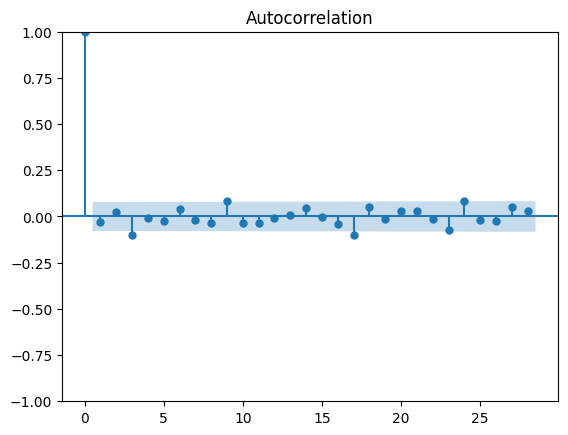

In [26]:
#plot the ACF
plot_acf(wt)
plt.show()

In [27]:
adfuller(wt)

(-15.743017278839677,
 1.2492826515886134e-28,
 2,
 622,
 {'1%': -3.4409070618215996,
  '5%': -2.8661978948030686,
  '10%': -2.569250572471335},
 3023.749098469295)

#Random Walk

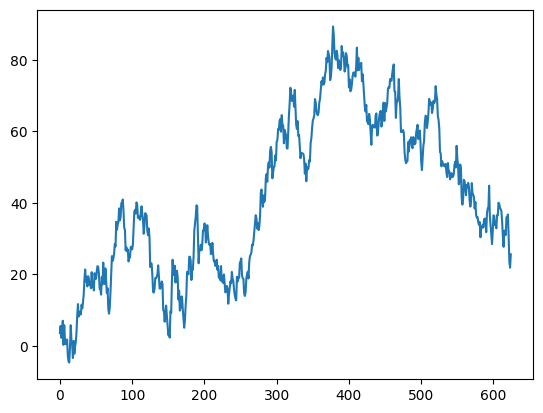

In [28]:
randow_walk = np.cumsum(wt)
plt.plot(randow_walk)

In [29]:
adfuller(randow_walk)

(-1.9006591356495486,
 0.331751096066652,
 3,
 621,
 {'1%': -3.440924132966757,
  '5%': -2.866205413627313,
  '10%': -2.5692545786625383},
 3021.617191582174)

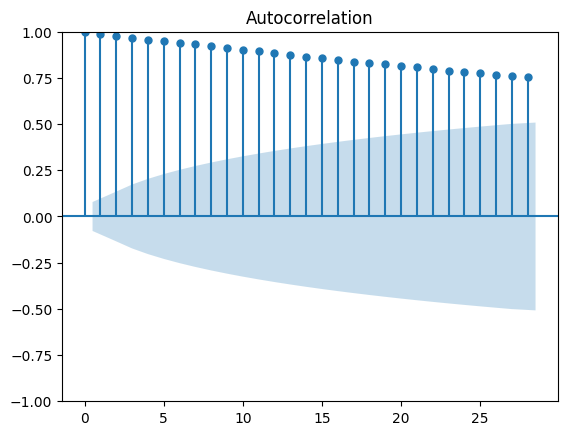

In [30]:
plot_acf(randow_walk)
plt.show()